In [20]:
import re
import os
import requests
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import collections

class TimeMachine:
    """The Time Machine dataset implemented with Keras."""
    
    def __init__(self, root='./data'):
        self.root = root
        os.makedirs(root, exist_ok=True)
        
    def download(self):
        """Download the Time Machine dataset."""
        url = 'https://d2l-data.s3-accelerate.amazonaws.com/timemachine.txt'
        file_path = os.path.join(self.root, 'timemachine.txt')
        
        # Only download if the file doesn't exist
        if not os.path.exists(file_path):
            print(f"Downloading {url} to {file_path}...")
            response = requests.get(url)
            with open(file_path, 'wb') as f:
                f.write(response.content)
            print("Download complete.")
        
        # Read the downloaded text file
        with open(file_path, 'r') as f:
            return f.read()
            
    def preprocess(self, text):
        """Preprocess the text by converting to lowercase and replacing non-alphabetic characters with spaces."""
        return re.sub('[^A-Za-z]+', ' ', text).lower()
       
    def tokenize(self, text):
        """Tokenize text into individual characters."""
        return list(text)
    
    def build(self, raw_text, vocab=None):
        """Build the vocabulary and corpus from raw text."""
        tokens = self.tokenize(self.preprocess(raw_text))
        if vocab is None: 
            vocab = Vocab(tokens)
        corpus = [vocab[token] for token in tokens]
        return corpus, vocab
    
    def plot_token_freqs(self):
        """Plot token frequencies on a log-log scale using matplotlib."""
        freqs = [freq for token, freq in self.token_freqs]
        
        plt.figure(figsize=(10, 6))
        plt.loglog(np.arange(1, len(freqs) + 1), freqs)
        plt.xlabel('token: x')
        plt.ylabel('frequency: n(x)')
        plt.title('Token Frequency Distribution')
        plt.grid(True, alpha=0.3)
        plt.show()

# Create an instance and download the data
data = TimeMachine()
raw_text = data.download()



In [21]:
# Preprocess the text
text = data.preprocess(raw_text)
print(text[:60])  # Display the first 60 characters

the time machine by h g wells i the time traveller for so it


In [22]:
# Tokenize the text
tokens = data.tokenize(text)
print(','.join(tokens[:30]))  # Display the first 30 tokens joined by commas

t,h,e, ,t,i,m,e, ,m,a,c,h,i,n,e, ,b,y, ,h, ,g, ,w,e,l,l,s, 


In [23]:
class Vocab:  #@save
    """Vocabulary for text."""
    def __init__(self, tokens=[], min_freq=0, reserved_tokens=[]):
        # Flatten a 2D list if needed
        if tokens and isinstance(tokens[0], list):
            tokens = [token for line in tokens for token in line]
        # Count token frequencies
        counter = collections.Counter(tokens)
        self.token_freqs = sorted(counter.items(), key=lambda x: x[1],
                                  reverse=True)
        # The list of unique tokens
        self.idx_to_token = list(sorted(set(['<unk>'] + reserved_tokens + [
            token for token, freq in self.token_freqs if freq >= min_freq])))
        self.token_to_idx = {token: idx
                             for idx, token in enumerate(self.idx_to_token)}

    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]

    def to_tokens(self, indices):
        if hasattr(indices, '__len__') and len(indices) > 1:
            return [self.idx_to_token[int(index)] for index in indices]
        return self.idx_to_token[indices]

    @property
    def unk(self):  # Index for the unknown token
        return self.token_to_idx['<unk>']


In [24]:
vocab = Vocab(tokens)
indices = vocab[tokens[:10]]
print('indices:', indices)
print('words:', vocab.to_tokens(indices))

indices: [21, 9, 6, 0, 21, 10, 14, 6, 0, 14]
words: ['t', 'h', 'e', ' ', 't', 'i', 'm', 'e', ' ', 'm']


In [25]:
# Build the corpus and vocabulary
corpus, vocab = data.build(raw_text)

# Display some information
print(f"Corpus length: {len(corpus)}, Vocabulary size: {len(vocab)}")

Corpus length: 173428, Vocabulary size: 28


In [26]:
words = text.split()
vocab = Vocab(words)
vocab.token_freqs[:10]

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]

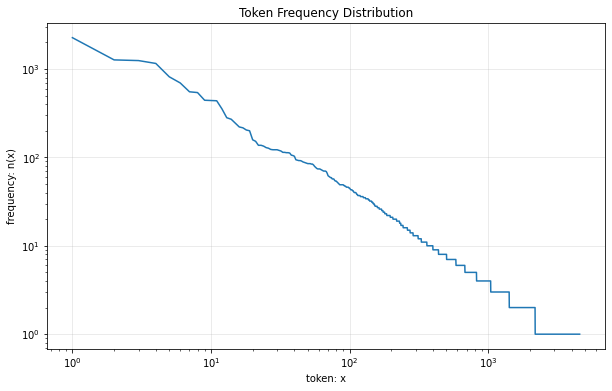

In [27]:
# Extract frequencies and plot them
freqs = [freq for token, freq in vocab.token_freqs]

# Plot using matplotlib
plt.figure(figsize=(10, 6))
plt.loglog(np.arange(1, len(freqs) + 1), freqs)
plt.xlabel('token: x')
plt.ylabel('frequency: n(x)')
plt.title('Token Frequency Distribution')
plt.grid(True, alpha=0.3)
plt.show()